In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")


In [ ]:
data = pd.read_csv('SMGR.JK.csv')

In [ ]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
#Fill Null data with mean values

data.reset_index(drop=True, inplace=True)
data.fillna(method = 'ffill', inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,9900.0,9900.0,9900.0,9900.0,9120.674805,0.0
1,2018-01-02,10100.0,10500.0,10100.0,10275.0,9466.155273,5258400.0
2,2018-01-03,10375.0,10500.0,10175.0,10200.0,9397.059570,6010700.0
3,2018-01-04,10350.0,11000.0,10325.0,11000.0,10134.083984,11108300.0
4,2018-01-05,11000.0,11025.0,10700.0,10900.0,10041.955078,5005400.0


In [ ]:
df = data

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,9900.0,9900.0,9900.0,9900.0,9120.674805,0.0
1,2018-01-02,10100.0,10500.0,10100.0,10275.0,9466.155273,5258400.0
2,2018-01-03,10375.0,10500.0,10175.0,10200.0,9397.059570,6010700.0
3,2018-01-04,10350.0,11000.0,10325.0,11000.0,10134.083984,11108300.0
4,2018-01-05,11000.0,11025.0,10700.0,10900.0,10041.955078,5005400.0


In [ ]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Check last few dates.

993    2021-12-10
994    2021-12-13
995    2021-12-14
996    2021-12-15
997    2021-12-16
998    2021-12-17
999    2021-12-20
1000   2021-12-21
1001   2021-12-22
1002   2021-12-23
1003   2021-12-24
1004   2021-12-27
1005   2021-12-28
1006   2021-12-29
1007   2021-12-30
Name: Date, dtype: datetime64[ns]


In [ ]:
df.shape

(1008, 7)

In [ ]:
#Variables for training
#Variables are Open, High, Low, Close, Adj Close
cols = list(df)[1:6]

In [ ]:
#Date and volume columns are not used in training.
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['Open', 'High', 'Low', 'Close', 'Adj Close']


In [ ]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

In [ ]:
df_for_training.shape

(1008, 5)

In [ ]:
df_for_training

,Open,High,Low,Close,Adj Close
0,9900.0,9900.0,9900.0,9900.0,9120.674805
1,10100.0,10500.0,10100.0,10275.0,9466.155273
2,10375.0,10500.0,10175.0,10200.0,9397.059570
3,10350.0,11000.0,10325.0,11000.0,10134.083984
4,11000.0,11025.0,10700.0,10900.0,10041.955078
...,...,...,...,...,...
1003,7325.0,7400.0,7250.0,7275.0,7087.364258
1004,7300.0,7500.0,7300.0,7400.0,7209.140137
1005,7450.0,7475.0,7350.0,7350.0,7160.429688
1006,7350.0,7375.0,7175.0,7225.0,7038.653809


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = []
Y = []

In [ ]:
len(df_for_training)

1008

In [ ]:
# 7 Data Historis
refpoint = df_for_training.iloc[10,3]

# 50 Data Historis
#refpoint = df_for_training.iloc[53,3]

In [ ]:
len(df_for_training)

1008

In [ ]:
#Fitur 7 Data Historis
window_size = 8

#Fitur 50 Data Historis
#window_size = 51

In [ ]:
X = []

for i in range(1 , window_size , 1):
    first = df_for_training.iloc[i,3]
    temp = []
    for j in range(len(df_for_training) - window_size -1):
        temp.append((df_for_training.iloc[i + j, 3] - first) / first)
    X.append(np.array(temp).reshape(999,1)) #999 or 956

In [ ]:
Y = []

for i in range(1 , len(df_for_training) - window_size, 1):
    temp2 = []
    temp2.append((df_for_training.iloc[i + window_size, 3] - refpoint) / refpoint)
    Y.append(np.array(temp2).reshape(1, 1))

In [ ]:
len(X)

7

In [ ]:
len(Y)

999

In [ ]:
X_n = np.array(X)

In [ ]:
X_n.shape

(7, 999, 1)

In [ ]:
# 7 Data Historis
X_dataframe = pd.DataFrame(X_n.reshape(7,999))

# 50 Data Historis
#X_dataframe = pd.DataFrame(X_n.reshape(50,956))

In [ ]:
X_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
0,0.0,-0.007299,0.070560,0.060827,0.070560,0.090024,0.053528,0.055961,0.029197,0.024331,...,-0.214112,-0.218978,-0.218978,-0.233577,-0.231144,-0.245742,-0.250608,-0.262774,-0.277372,-0.287105
1,0.0,0.078431,0.068627,0.078431,0.098039,0.061275,0.063725,0.036765,0.031863,0.041667,...,-0.213235,-0.213235,-0.227941,-0.225490,-0.240196,-0.245098,-0.257353,-0.272059,-0.281863,-0.272059
2,0.0,-0.009091,0.000000,0.018182,-0.015909,-0.013636,-0.038636,-0.043182,-0.034091,0.036364,...,-0.270455,-0.284091,-0.281818,-0.295455,-0.300000,-0.311364,-0.325000,-0.334091,-0.325000,-0.340909
3,0.0,0.009174,0.027523,-0.006881,-0.004587,-0.029817,-0.034404,-0.025229,0.045872,0.016055,...,-0.277523,-0.275229,-0.288991,-0.293578,-0.305046,-0.318807,-0.327982,-0.318807,-0.334862,-0.330275
4,0.0,0.018182,-0.015909,-0.013636,-0.038636,-0.043182,-0.034091,0.036364,0.006818,-0.004545,...,-0.281818,-0.295455,-0.300000,-0.311364,-0.325000,-0.334091,-0.325000,-0.340909,-0.336364,-0.338636


In [ ]:
X_dataframe2 = X_dataframe.T
X_dataframe2

,0,1,2,3,4,5,6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.007299,0.078431,-0.009091,0.009174,0.018182,-0.033482,0.002309
2,0.070560,0.068627,0.000000,0.027523,-0.015909,-0.031250,-0.023095
3,0.060827,0.078431,0.018182,-0.006881,-0.013636,-0.055804,-0.027714
4,0.070560,0.098039,-0.015909,-0.004587,-0.038636,-0.060268,-0.018476
...,...,...,...,...,...,...,...
994,-0.245742,-0.245098,-0.311364,-0.318807,-0.334091,-0.337054,-0.330254
995,-0.250608,-0.257353,-0.325000,-0.327982,-0.325000,-0.352679,-0.325635
996,-0.262774,-0.272059,-0.334091,-0.318807,-0.340909,-0.348214,-0.327945
997,-0.277372,-0.281863,-0.325000,-0.334862,-0.336364,-0.350446,-0.316397


In [ ]:
#Bigchances si Y juga harus dilakukan ky si X_dataframe2

In [ ]:
len(Y)

999

In [ ]:
Y_n = np.array(Y)

In [ ]:
Y_n.shape

(999, 1, 1)

In [ ]:
# 7 Data Historis
Y_dataframe = pd.DataFrame(Y_n.reshape(999,1))

# 50 Data Historis
#Y_dataframe = pd.DataFrame(Y_n.reshape(956,1))

In [ ]:
Y_dataframe

,0
0,0.004751
1,0.000000
2,0.009501
3,0.083135
4,0.052257
...,...
994,-0.308789
995,-0.296912
996,-0.301663
997,-0.313539


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_dataframe2, Y_dataframe, test_size=0.2, shuffle = False)

train_X = np.array(x_train)
test_X = np.array(x_test)

train_Y = np.array(y_train)
test_Y = np.array(y_test)

print(len(train_X))
print(len(test_X))

print(len(train_Y))
print(len(test_Y))


764
192
764
192


In [ ]:
print("X_train shape: {}".format(train_X.shape))
print("X_test shape: {}".format(test_X.shape))

print("y_train shape: {}".format(train_Y.shape))
print("y_test shape: {}".format(test_Y.shape))


X_train shape: (764, 50)
X_test shape: (192, 50)
y_train shape: (764, 1)
y_test shape: (192, 1)


In [ ]:
# Fitur 7 Data Historis
#train_X = train_X.reshape(799,1,7,1)
#test_X = test_X.reshape(200,1,7,1)
#train_Y = train_Y.reshape(799,1,1)
#test_Y = test_Y.reshape(200,1,1)

# Fitur 50 Data Historis
train_X = train_X.reshape(764,1,50,1)
test_X = test_X.reshape(192,1,50,1)
train_Y = train_Y.reshape(764,1,1)
test_Y = test_Y.reshape(192,1,1)

train_X = train_X.reshape(train_X.shape[0],1,50,1)
test_X = test_X.reshape(test_X.shape[0],1,50,1)

50 itu aku bikin buat testrun aja biar mudah dilihat, sebelumnya 100

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping

In [ ]:
model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(32, kernel_size=1, activation='relu', padding = 'same', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(1)))

#model.add(TimeDistributed(Conv1D(32, kernel_size=1, activation='relu', padding = 'same', input_shape=(None, 100, 1))))
#model.add(TimeDistributed(MaxPooling1D(1)))

#model.add(TimeDistributed(Conv1D(32, kernel_size=1, activation='relu', padding = 'same', input_shape=(None, 100, 1))))
#model.add(TimeDistributed(MaxPooling1D(1)))

#model.add(TimeDistributed(Conv1D(32, kernel_size=1, activation='relu', padding = 'same', input_shape=(None, 100, 1))))
#model.add(TimeDistributed(MaxPooling1D(1)))

#model.add(TimeDistributed(Conv1D(32, kernel_size=1, activation='relu', padding = 'same', input_shape=(None, 100, 1))))
#model.add(TimeDistributed(MaxPooling1D(1)))

model.add(TimeDistributed(Flatten()))

# BiLSTM Layer
model.add(Bidirectional(LSTM(units = 64, activation = 'tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(units = 64, activation = 'tanh', return_sequences=False)))

# LSTM layers
#model.add(LSTM(units = 64, activation = 'tanh', return_sequences=True))
#model.add(LSTM(units = 64, activation = 'tanh', return_sequences=False))

model.add(Dropout(0.6))


#Final layers
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience = 20)
history = model.fit(train_X, train_Y, validation_data = None, epochs=1000, batch_size=32, verbose=1, shuffle = False, callbacks = [es])

Epoch 1/1000
24/24 [==============================] - 10s 18ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1299
Epoch 2/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0755
Epoch 3/1000
24/24 [==============================] - 0s 17ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0803
Epoch 4/1000
24/24 [==============================] - 0s 17ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0659
Epoch 5/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0634
Epoch 6/1000
24/24 [==============================] - 0s 17ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0481
Epoch 7/1000
24/24 [==============================] - 0s 17ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0525
Epoch 8/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0509
Epoch 9/1000
24/24 [==============================] - 0s 17ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0541
Epoch 10/

batch_size = 32 itu default

In [ ]:
valpredTrain = model.predict(train_X)

24/24 [==============================] - 2s 6ms/step


In [ ]:
valpredTrain.shape

(764, 1)

In [ ]:
valpredTrainin1d = valpredTrain[:, 0]

In [ ]:
valpredTrainin1d.shape

(764,)

In [ ]:
train_Y.shape

(764, 1, 1)

In [ ]:
train_Y_reshape = train_Y.reshape(-1,1)

In [ ]:
train_Y_reshape.shape

(764, 1)

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(train_Y_reshape, valpredTrainin1d)
print('R2 Score: %f' % R2)

R2 Score: 0.818667


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_96 (TimeDi  (None, 1, 50, 32)        64        
 stributed)                                                      
                                                                 
 time_distributed_97 (TimeDi  (None, 1, 50, 32)        0         
 stributed)                                                      
                                                                 
 time_distributed_98 (TimeDi  (None, 1, 1600)          0         
 stributed)                                                      
                                                                 
 bidirectional_62 (Bidirecti  (None, 1, 128)           852480    
 onal)                                                           
                                                                 
 bidirectional_63 (Bidirecti  (None, 128)            

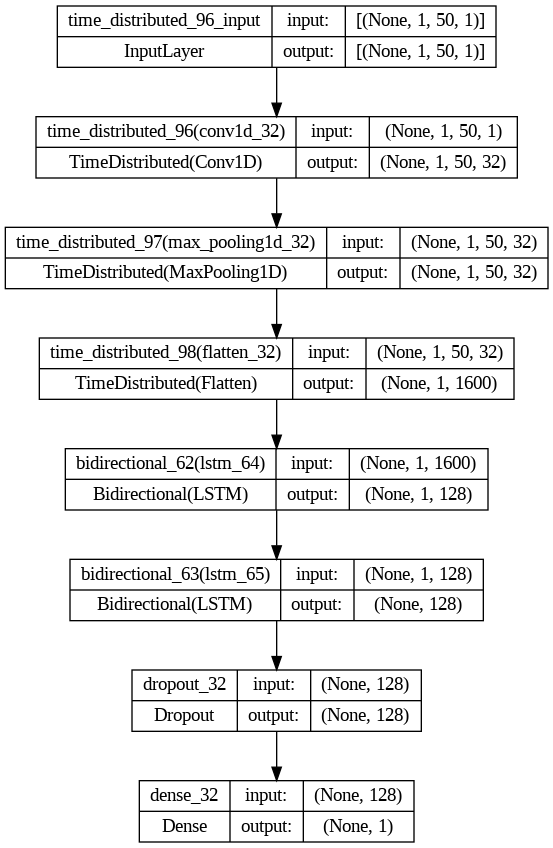

In [ ]:
# After the model architect has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

6/6 [==============================] - 2s 6ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0386


[0.002262250753119588, 0.002262250753119588, 0.03862844035029411]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
valpredtest = model.predict(test_X) #ini prediksi angka

6/6 [==============================] - 0s 6ms/step


In [ ]:
valpredtest

array([[-0.05188159],
       [-0.05097546],
       [-0.05006835],
       [-0.05085443],
       [-0.05057642],
       [-0.04989509],
       [-0.04970586],
       [-0.04998868],
       [-0.05002976],
       [-0.05367712],
       [-0.05669784],
       [-0.05817447],
       [-0.05984027],
       [-0.06309593],
       [-0.06961456],
       [-0.07473128],
       [-0.07954862],
       [-0.08732648],
       [-0.09375372],
       [-0.0969809 ],
       [-0.09994661],
       [-0.10474743],
       [-0.11036588],
       [-0.11321607],
       [-0.11538171],
       [-0.11770121],
       [-0.11907116],
       [-0.11897936],
       [-0.12155665],
       [-0.12839022],
       [-0.13348977],
       [-0.13807   ],
       [-0.14173129],
       [-0.14529517],
       [-0.14837718],
       [-0.15116352],
       [-0.15450847],
       [-0.15710524],
       [-0.16072594],
       [-0.16853064],
       [-0.17529403],
       [-0.18209316],
       [-0.18372263],
       [-0.18546653],
       [-0.18617822],
       [-0

In [ ]:
valpredtest.shape

(192, 1)

In [ ]:
# reduce to 1d array
valpredtestin1d = valpredtest[:, 0]

In [ ]:
valpredtestin1d.shape

(192,)

In [ ]:
test_Y.shape

(192, 1, 1)

In [ ]:
test_Y_reshape = test_Y.reshape(-1,1)

In [ ]:
test_Y_reshape.shape

(192, 1)

In [ ]:
test_Y_reshape[0:10]

array([[-0.01792115],
       [-0.03584229],
       [-0.03225806],
       [-0.03942652],
       [-0.05734767],
       [-0.0609319 ],
       [-0.05017921],
       [-0.08960573],
       [-0.09677419],
       [-0.09677419]])

In [ ]:
valpredtestin1d[0:10]

array([-0.05188159, -0.05097546, -0.05006835, -0.05085443, -0.05057642,
       -0.04989509, -0.04970586, -0.04998868, -0.05002976, -0.05367712],
      dtype=float32)

In [ ]:
#Use all test_Y_reshape data and valpredtestin1d data

MSE_Test = mean_squared_error(test_Y.reshape(-1,1), valpredtestin1d, squared = True)
print('Mean Squared Error %f' % MSE_Test)

MAE_Test = mean_absolute_error(test_Y.reshape(-1,1), valpredtestin1d)
print('Mean Absolute Error %f' %MAE_Test)

RMSE_Test = mean_squared_error(test_Y.reshape(-1,1), valpredtestin1d, squared = False)
print('Root Mean Squared Error %f' % RMSE_Test)


print('============================')
#Use first 10 data in test_Y_reshape and valpredtestin1d
test_Y_first10 = test_Y_reshape[0:10]
valpredtestin1d_first10 = valpredtestin1d[0:10]

MSE_10 = mean_squared_error(test_Y_first10, valpredtestin1d_first10, squared = True)
print('Mean Squared Error %f' % MSE_10)

MAE_10 = mean_absolute_error(test_Y_first10, valpredtestin1d_first10)
print('Mean Absolute Error %f' %MAE_10)

RMSE_10 = mean_squared_error(test_Y_first10, valpredtestin1d_first10, squared = False)
print('Root Mean Squared Error %f' % RMSE_10)

Mean Squared Error 0.002262
Mean Absolute Error 0.038628
Root Mean Squared Error 0.047563
Mean Squared Error 0.000761
Mean Absolute Error 0.022607
Root Mean Squared Error 0.027586


In [ ]:
print('%.5f'% MSE_Test, '%.5f'% MAE_Test, '%.5f'% RMSE_Test, '%.5f'% MSE_10, '%.5f'% MAE_10, '%.5f'% RMSE_10)

0.00226 0.03863 0.04756 0.00076 0.02261 0.02759


In [ ]:
valpredreal = np.concatenate((valpredTrain,valpredtest)) #ini nilai scaling terus di proses jadi hasil prediksi
valpredreal.shape

(956, 1)

In [ ]:
##sampai disini bagian memasukkan hasil prediksi training ke testing kedalam 1 array sudah berhasil
#ini nanti akan menjadi Data Predicted Stock Price

In [ ]:
#Sekarang akan masuk ke tahap menyatukan kembali real stock price ke dalam 1 array yang sama

In [ ]:
train_Y_reshape.shape

(764, 1)

In [ ]:
realtrainprice = train_Y_reshape

In [ ]:
realtestprice = test_Y_reshape

In [ ]:
realprice = np.concatenate((realtrainprice,realtestprice))
realprice.shape

(956, 1)

In [ ]:
#Inverse kembalik semua scaling keharga sebenarnya
for i in range(0,len(valpredreal),1):
  realprice[i - len(valpredreal)] = realprice[i - len(valpredreal)] * refpoint + refpoint
  valpredreal[i - len(valpredreal)] = valpredreal[i - len(valpredreal)] * refpoint + refpoint

In [ ]:
##predtrain range
trainrange = np.arange(0,len(valpredTrain),1)
testrange = np.arange(len(valpredTrain),len(valpredTrain)+len(valpredtest),1)

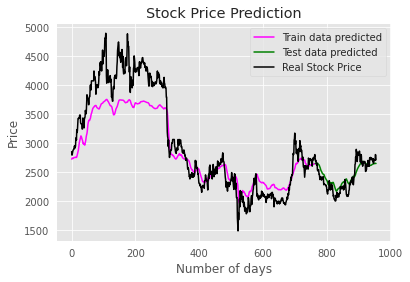

In [ ]:
##ini plot yang akhir
plt.plot(
    trainrange,
    valpredreal[0:len(valpredTrain)],
    color = 'magenta',
    label = 'Train data predicted'
)

plt.plot(
    testrange,
    valpredreal[len(valpredTrain):len(valpredTrain)+len(valpredtest)],
    color = 'green',
    label = 'Test data predicted',
)

plt.plot(
    realprice,
    color = 'black',
    label = 'Real Stock Price',
)

plt.title('Stock Price Prediction')
plt.ylabel('Price')
plt.xlabel('Number of days')
plt.legend()
plt.show()